# GitHub analysis client
This notebook assumes that Pulsar is running and there are already partial results available

In [1]:
import matplotlib.pyplot as plt
import operator
import os
import pandas as pd
import sortedcontainers
from pulsar_wrapper import PulsarConnection

In [2]:
class LanguageTuple(object):
    """ Data Type to support tuple in-place sorting using sortedcontainers """
    def __init__(self, lang_tuple):
        self.lang = lang_tuple[0]
        self.value = int(lang_tuple[1] or 0)
        
    def __repr__(self):
        return f"('{self.lang}', {self.value})"

def sort_results(language_stats, field, num_results=None):
    lang_repos = sortedcontainers.SortedKeyList(key=lambda x: -x.value)
    for language in language_stats:
        lang_repos.add(LanguageTuple((language, language_stats[language][field])))
    return list(lang_repos[:num_results])

In [3]:
# Function to plot the results
def plot_result(result_tuple, title='', xlabel='', ylabel=''):
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)

    ax.set_ylabel(ylabel)
    ax.set_title(title)

    x_axis = [val.lang for val in result_tuple]
    y_axis = [val.value for val in result_tuple]
    plt.bar(range(len(result_tuple)), y_axis, tick_label=x_axis)
    plt.show()

In [4]:
# Take Pulsar host value from the environment variables
environment = os.environ
pulsar_host = environment.get("pulsar_host")
# If not set, assume its running in localhost
if (pulsar_host is None): pulsar_host = 'localhost'
my_pulsar = PulsarConnection(ip_address=pulsar_host)

2022-06-03 16:53:25.969 INFO  [140224850126656] ClientConnection:189 | [<none> -> pulsar://localhost:6650] Create ClientConnection, timeout=10000
2022-06-03 16:53:25.970 INFO  [140224850126656] ConnectionPool:96 | Created connection for pulsar://localhost:6650
2022-06-03 16:53:25.975 INFO  [140223898076928] ClientConnection:375 | [127.0.0.1:32832 -> 127.0.0.1:6650] Connected to broker
2022-06-03 16:53:25.987 INFO  [140223898076928] HandlerBase:64 | [persistent://public/static/initialized, reader-54f213990e, 0] Getting connection from pool
2022-06-03 16:53:25.997 INFO  [140223898076928] ConsumerImpl:224 | [persistent://public/static/initialized, reader-54f213990e, 0] Created consumer on broker [127.0.0.1:32832 -> 127.0.0.1:6650] 
Found 'Initializing' message
Found 'Initialized' message
2022-06-03 16:53:26.020 INFO  [140224850126656] ConsumerImpl:999 | [persistent://public/static/initialized, reader-54f213990e, 0] Closing consumer for topic persistent://public/static/initialized
2022-06-

In [5]:
cur_cutoff_date = my_pulsar.get_current_cuttoff_date()

2022-06-03 16:53:29.410 INFO  [140223898076928] HandlerBase:64 | [persistent://public/static/initialized, reader-c3fc1a95e6, 1] Getting connection from pool
2022-06-03 16:53:29.414 INFO  [140223898076928] ConsumerImpl:224 | [persistent://public/static/initialized, reader-c3fc1a95e6, 1] Created consumer on broker [127.0.0.1:32832 -> 127.0.0.1:6650] 
2022-06-03 16:53:29.418 INFO  [140224850126656] ConsumerImpl:999 | [persistent://public/static/initialized, reader-c3fc1a95e6, 1] Closing consumer for topic persistent://public/static/initialized
2022-06-03 16:53:29.420 INFO  [140223898076928] ConsumerImpl:1055 | [persistent://public/static/initialized, reader-c3fc1a95e6, 1] Closed consumer 1


In [6]:
cur_cutoff_date

'Initialized'

In [14]:
my_pulsar.process_results(cutoff_date='2021-01-02')

2022-06-03 16:57:46.815 INFO  [140224850126656] HandlerBase:64 | [persistent://public/static/initialized, reader-ff13932e20, 8] Getting connection from pool
2022-06-03 16:57:46.820 INFO  [140223898076928] ConsumerImpl:224 | [persistent://public/static/initialized, reader-ff13932e20, 8] Created consumer on broker [127.0.0.1:32832 -> 127.0.0.1:6650] 
2022-06-03 16:57:46.824 INFO  [140224850126656] ConsumerImpl:999 | [persistent://public/static/initialized, reader-ff13932e20, 8] Closing consumer for topic persistent://public/static/initialized
2022-06-03 16:57:46.825 INFO  [140223898076928] ConsumerImpl:1055 | [persistent://public/static/initialized, reader-ff13932e20, 8] Closed consumer 8
2022-06-03 16:57:46.826 INFO  [140223898076928] HandlerBase:64 | [persistent://public/static/languages, reader-1f9452508f, 9] Getting connection from pool
2022-06-03 16:57:46.828 INFO  [140223898076928] ConsumerImpl:224 | [persistent://public/static/languages, reader-1f9452508f, 9] Created consumer on b

True

2022-06-03 16:57:47.582 INFO  [140224850126656] ProducerImpl:655 | Producer - [persistent://public/static/initialized, initialized_prod_1654275467] , [batching  = off]
2022-06-03 16:57:47.582 WARN  [140224850126656] ProducerImpl:114 | [persistent://public/static/initialized, initialized_prod_1654275467] Destroyed producer which was not properly closed
2022-06-03 16:57:47.582 INFO  [140224850126656] ProducerImpl:655 | Producer - [persistent://public/static/aggregate_languages_info, aggregate_languages_info_prod] , [batching  = off]


In [15]:
language_stats = my_pulsar.get_languages_stats()

2022-06-03 16:57:50.919 INFO  [140224850126656] HandlerBase:64 | [persistent://public/static/language_results, reader-64ed1659f0, 11] Getting connection from pool
2022-06-03 16:57:50.923 INFO  [140223898076928] ConsumerImpl:224 | [persistent://public/static/language_results, reader-64ed1659f0, 11] Created consumer on broker [127.0.0.1:32832 -> 127.0.0.1:6650] 
2022-06-03 16:57:50.944 INFO  [140224850126656] ConsumerImpl:999 | [persistent://public/static/language_results, reader-64ed1659f0, 11] Closing consumer for topic persistent://public/static/language_results
2022-06-03 16:57:50.946 INFO  [140223898076928] ConsumerImpl:1055 | [persistent://public/static/language_results, reader-64ed1659f0, 11] Closed consumer 11


In [16]:
language_stats

{'Jupyter Notebook': {'num_repos': 77, 'num_tests': 4, 'num_ci': 0},
 'Rust': {'num_repos': 39, 'num_tests': 5, 'num_ci': 0},
 'HTML': {'num_repos': 84, 'num_tests': 5, 'num_ci': 0},
 'JavaScript': {'num_repos': 257, 'num_tests': 16, 'num_ci': 1},
 'None': {'num_repos': 195, 'num_tests': 2, 'num_ci': 1},
 'Elixir': {'num_repos': 7, 'num_tests': 2, 'num_ci': 0},
 'C++': {'num_repos': 109, 'num_tests': 8, 'num_ci': 0},
 'Python': {'num_repos': 353, 'num_tests': 32, 'num_ci': 2},
 'Lua': {'num_repos': 21, 'num_tests': 1, 'num_ci': 0},
 'Swift': {'num_repos': 21, 'num_tests': 1, 'num_ci': 0},
 'TypeScript': {'num_repos': 140, 'num_tests': 35, 'num_ci': 2},
 'Nix': {'num_repos': 5, 'num_tests': 0, 'num_ci': 0},
 'PHP': {'num_repos': 47, 'num_tests': 8, 'num_ci': 0},
 'Kotlin': {'num_repos': 29, 'num_tests': 10, 'num_ci': 0},
 'R': {'num_repos': 19, 'num_tests': 5, 'num_ci': 2},
 'Go': {'num_repos': 62, 'num_tests': 14, 'num_ci': 0},
 'C#': {'num_repos': 75, 'num_tests': 3, 'num_ci': 0},
 'Z

In [17]:
repo_sum, num_tests, num_ci = 0, 0, 0
for language in language_stats:
    repo_sum+=int(language_stats[language]['num_repos'] or 0)
    num_tests+=int(language_stats[language]['num_tests'] or 0)
    num_ci+=int(language_stats[language]['num_ci'] or 0)
print(f"Num repos: {repo_sum}")
print(f"Num tests: {num_tests}")
print(f"Num ci: {num_ci}")

Num repos: 1989
Num tests: 197
Num ci: 11


# 1. Top programming languages based on the number of projects developed

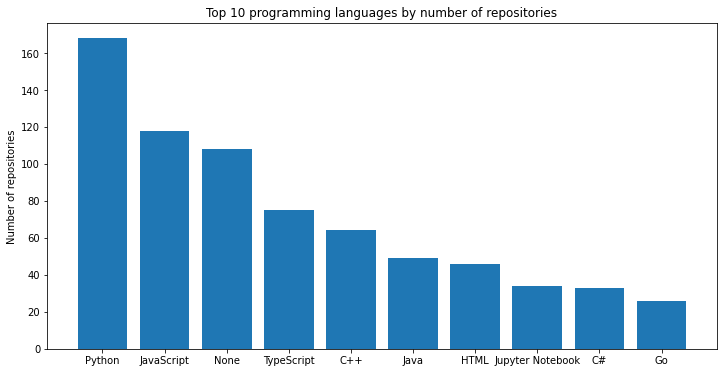

In [11]:
# Define the number of top languages to return, get the results, and plot them
num_results = 10
lang_repos = sort_results(language_stats, 'num_repos', num_results)
plot_result(lang_repos, 
          title=f'Top {len(lang_repos)} programming languages by number of repositories', 
          xlabel='', ylabel='Number of repositories')

# 2. Repositories with most commits

In [18]:
top_repos = my_pulsar.get_top_commits()

2022-06-03 16:58:01.847 INFO  [140223898076928] HandlerBase:64 | [persistent://public/static/initialized, reader-abcd7bfc2b, 12] Getting connection from pool
2022-06-03 16:58:01.851 INFO  [140223898076928] ConsumerImpl:224 | [persistent://public/static/initialized, reader-abcd7bfc2b, 12] Created consumer on broker [127.0.0.1:32832 -> 127.0.0.1:6650] 
2022-06-03 16:58:01.857 INFO  [140224850126656] ConsumerImpl:999 | [persistent://public/static/initialized, reader-abcd7bfc2b, 12] Closing consumer for topic persistent://public/static/initialized

*** Showing partial results up to 2021-01-02 (info is still being processed) ***

2022-06-03 16:58:01.857 INFO  [140223898076928] ConsumerImpl:1055 | [persistent://public/static/initialized, reader-abcd7bfc2b, 12] Closed consumer 12
2022-06-03 16:58:01.859 INFO  [140223898076928] HandlerBase:64 | [persistent://public/static/2021-01-02_result_commit, reader-55771f33ba, 13] Getting connection from pool
2022-06-03 16:58:01.861 INFO  [14022389807692

In [19]:
top_repos

[('AOSP-Krypton/frameworks_base', 661920),
 ('GiorgioComitini/COVID-19', 107359),
 ('WangTingMan/chromebase', 21989),
 ('helaili/enterprise-showcase', 12146),
 ('wiredfool/pillow-fuzz', 11254),
 ('itizaworld/webev', 3290),
 ('extremscorner/libogc2', 1935),
 ('YusufSuleman/piskel2', 1833),
 ('TownyAdvanced/SiegeWar', 1424),
 ('Andeeeee/AndyCogs', 1219)]

In [20]:
pd.DataFrame(top_repos, columns=['Repository name','Number of commits'])

,Repository name,Number of commits
0,AOSP-Krypton/frameworks_base,661920
1,GiorgioComitini/COVID-19,107359
2,WangTingMan/chromebase,21989
3,helaili/enterprise-showcase,12146
4,wiredfool/pillow-fuzz,11254
5,itizaworld/webev,3290
6,extremscorner/libogc2,1935
7,YusufSuleman/piskel2,1833
8,TownyAdvanced/SiegeWar,1424
9,Andeeeee/AndyCogs,1219


# 3. Top languages with testdriven approach

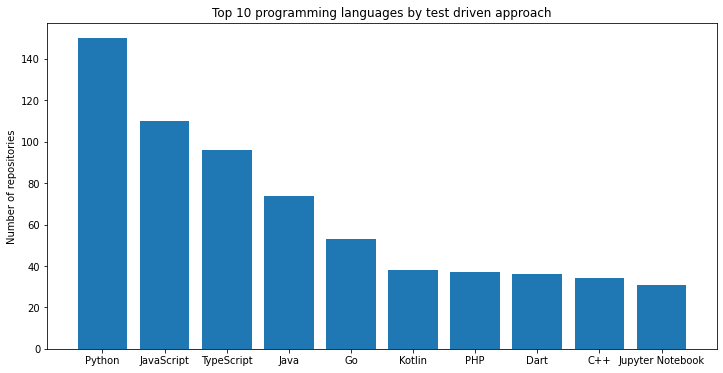

2022-06-03 15:24:36.395 ERROR [139894332585728] ClientConnection:597 | [127.0.0.1:47546 -> 127.0.0.1:6650] Read operation failed: End of file
2022-06-03 15:24:36.395 INFO  [139894332585728] ClientConnection:1559 | [127.0.0.1:47546 -> 127.0.0.1:6650] Connection closed
2022-06-03 15:24:36.396 INFO  [139894332585728] ClientConnection:263 | [127.0.0.1:47546 -> 127.0.0.1:6650] Destroyed connection


In [20]:
# Define the number of top languages to return, get the results, and plot them
num_results_test = 10
lang_repos_test = sort_results(language_stats, 'num_tests', num_results_test)
plot_result(lang_repos_test, 
          title=f'Top {len(lang_repos_test)} programming languages by test driven approach', 
          xlabel='', ylabel='Number of repositories')

# 4. Top languages with testdriven approach and continous integration

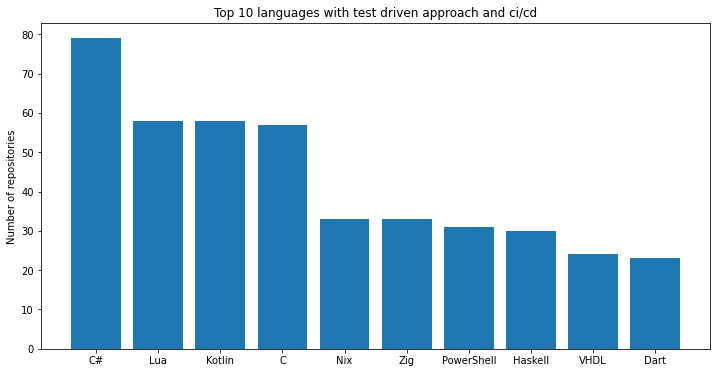

In [10]:
# Define the number of top languages to return, get the results, and plot them
num_results_ci = 10
lang_repos_ci = sort_results(language_stats, 'num_ci', num_results_ci)
plot_result(lang_repos_ci, 
          title=f'Top {len(lang_repos_ci)} languages with test driven approach and ci/cd', 
          xlabel='', ylabel='Number of repositories')

In [10]:
my_pulsar.close()

2022-06-03 14:56:59.574 INFO  [139632636331840] ClientImpl:496 | Closing Pulsar client with 3 producers and 6 consumers
2022-06-03 14:56:59.574 INFO  [139632636331840] ClientConnection:1559 | [127.0.0.1:59128 -> 127.0.0.1:6650] Connection closed
2022-06-03 14:56:59.574 INFO  [139632636331840] ClientConnection:263 | [127.0.0.1:59128 -> 127.0.0.1:6650] Destroyed connection


In [7]:
# Receives tuples in format (id_repo, num_commits, 'repo_owner', 'repo_name')
#top_repos = my_pulsar.get_top_commits(10)
if False:
    # Test data meanwhile
    top_repos = [
        (4, 16, 'owner_1', 'repo_1'),
        (5, 21, 'owner_2', 'repo_2'),
        (6, 26, 'owner_3', 'repo_3')]
    results=[]
    for repo in top_repos:
        repo_name = f"{repo[2]}/{repo[3]}"
        results.append((repo_name, repo[1]))

In [5]:
if False:
    # While we get real data, populate with test data num_tests and num_ci
    import random
    for language in language_stats:
        language_stats[language]['num_tests'] = random.randint(1,100)
        language_stats[language]['num_ci'] = random.randint(1,language_stats[language]['num_tests'])